In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
n = np.array([[1, 2, 3], [2, 3, 4], [1, 2, 5]])

In [5]:
# n是否是一个满秩矩阵
# 计算矩阵的秩,通过判断秩和矩阵的阶数是否相同来判断是否是满秩矩阵
# 线性代数 linear algebra
np.linalg.matrix_rank(n) # n是满秩的

3

In [7]:
n2 = np.array([[1, 2, 3], [2, 3, 4], [2, 4, 6]])

In [8]:
np.linalg.matrix_rank(n2)  # n2是一个奇异矩阵

2

In [ ]:
AB = CD
# 求A?
# 矩阵没有除法
# 又想消除B, 等式两边乘上B矩阵的逆
A B B^-1 = CDB^-1
# B B^-1 = I 单位矩阵相当于实数的1, 任何矩阵乘上单位矩阵都等于它本身, A I = A

In [9]:
# 求n的逆 inverse
np.dot(n, np.linalg.inv(n))

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
# 求n2的逆矩阵, Singular matrix 奇异矩阵没有逆矩阵
np.linalg.inv(n2)

LinAlgError: Singular matrix

In [ ]:
假设一帮孩子和家长出去旅游，去程坐的是bus，小孩票价为3元，家长票价为3.2元；
回程坐的是Train，小孩票价为3.5元，家长票价为3.6元。
坐bus总共花费118.4元,坐train总共花费135.2元,问题是分别求小孩和家长的人数。

In [ ]:
# 假设小孩人数是x, 家长人数是y, 列方程组
3 * x + 3.2 * y = 118.4
3.5 * x + 3.6 * y = 135.2

In [24]:
price = np.array([[3, 3.2], [3.5, 3.6]])

In [29]:
np.dot(np.linalg.inv(price), np.array([118.4, 135.2]))

array([16., 22.])

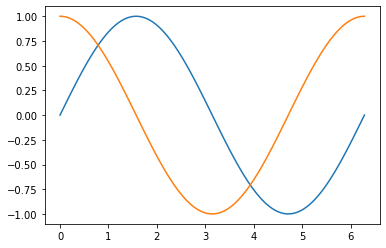

In [30]:
# 关于导数
x = np.linspace(0, 2*np.pi, 100)
plt.plot(x, np.sin(x), x, np.cos(x))

In [31]:
n = np.random.randint(0, 10, size=(10,))
n

array([3, 7, 3, 0, 5, 4, 7, 8, 3, 4])

In [32]:
(n ** 2).sum()

246

In [33]:
np.dot(n.T, n)

246

In [ ]:
# 感受一下线性回归的推导

$$\theta = (X^TX)^{-1}X^Ty$$

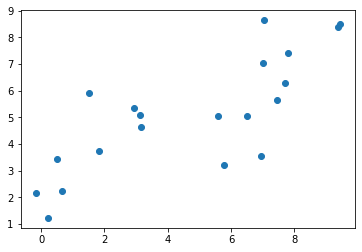

In [41]:
x = np.linspace(0, 10, num=20) + np.random.randn(20)
y = np.linspace(2, 8, num=20) + np.random.randn(20)
plt.scatter(x, y)

In [42]:
# 为了把线性方程y= θX的形式, 必须在X前面加上一列1 
X = np.hstack((np.ones(shape=(20, 1)), x.reshape(-1, 1)))
X

array([[ 1.        ,  0.64433341],
       [ 1.        ,  0.50043066],
       [ 1.        , -0.17296308],
       [ 1.        ,  0.21637599],
       [ 1.        ,  3.16866811],
       [ 1.        ,  1.82966637],
       [ 1.        ,  3.13062838],
       [ 1.        ,  1.50930688],
       [ 1.        ,  2.92191272],
       [ 1.        ,  5.76521225],
       [ 1.        ,  5.60041411],
       [ 1.        ,  6.93737268],
       [ 1.        ,  6.49466605],
       [ 1.        ,  7.00129659],
       [ 1.        ,  7.72341956],
       [ 1.        ,  9.45361969],
       [ 1.        ,  7.45085987],
       [ 1.        ,  7.04647283],
       [ 1.        ,  7.81351085],
       [ 1.        ,  9.3962671 ]])

In [44]:
np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

array([2.65515055, 0.52435237])

In [45]:
sheta0 = 2.65515055
sheta1 = 0.52435237

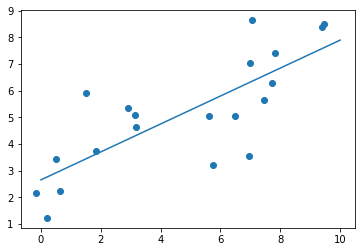

In [48]:
plt.scatter(x ,y)
x_test = np.linspace(0, 10, num=10)
y_test = sheta1 * x_test + sheta0
plt.plot(x_test, y_test)

In [2]:
from sklearn.linear_model import LinearRegression

In [51]:
linear = LinearRegression()
linear.fit(x.reshape(-1, 1), y)

LinearRegression()

In [52]:
# 即w
linear.coef_

array([0.52435237])

In [53]:
# 截距
linear.intercept_

2.6551505510176594

# 线性回归

## 【关键词】最小二乘法，线性

## 一、普通线性回归

### 1、原理

分类的目标变量是标称型数据，而回归将会对连续型的数据做出预测。

应当怎样从一大堆数据里求出回归方程呢？

假定输人数据存放在矩阵X中，而回归系数存放在向量W中。那么对于给定的数据X1, 预测结果将会通过

Y=X*W

给出。现在的问题是，手里有一些X和对应的Y,怎样才能找到W呢？

一个常用的方法就是找出使误差最小的W。这里的误差是指预测Y值和真实Y值之间的差值，使用该误差的简单累加将使得正差值和负差值相互抵消，所以我
们采用平方误差。

最小二乘法

平方误差可以写做:

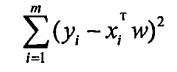

对W求导，当导数为零时，平方误差最小，此时W等于：

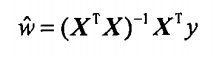

例如有下面一张图片：

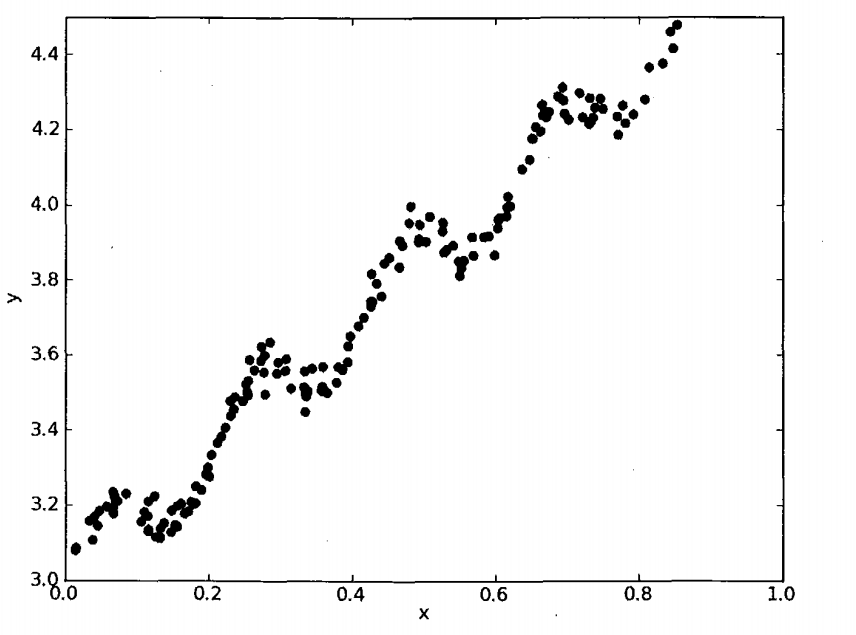

求回归曲线，得到：

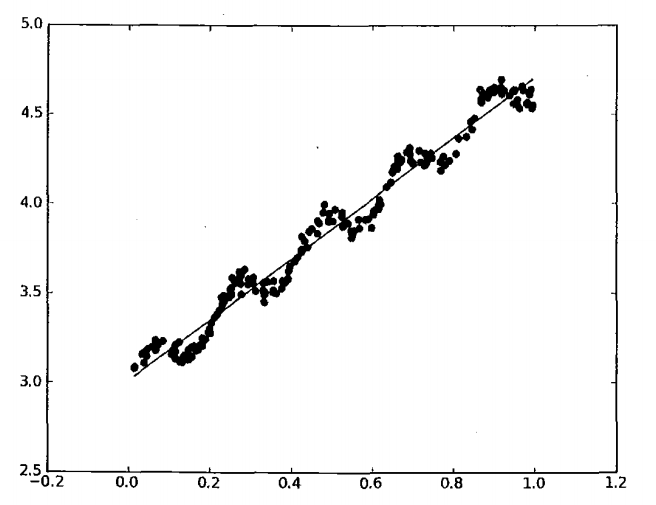

### 2、实例

导包

In [3]:
from sklearn.datasets import load_diabetes

获取糖尿病数据

In [4]:
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target
feature_names = diabetes.feature_names

In [5]:
data.shape

(442, 10)

In [6]:
target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [7]:
from pandas import DataFrame

In [8]:
df = DataFrame(data=data, columns=feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [9]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

抽取训练数据和预测数据

In [10]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

创建数学模型

In [12]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [13]:
linear.predict(X_test)

array([121.55797701, 211.0334997 , 123.98242826, 158.15754169,
       296.37362835, 133.03501961,  77.75575276,  74.66592507,
       164.61750992, 143.62673941, 115.55784197, 177.00458396,
       185.74562986, 123.0642642 , 146.47326499, 145.98696874,
        74.14990354, 107.81587461, 171.18144267, 192.74831414,
       185.16332968, 178.92783639, 163.02405844, 153.15084538,
        89.28511835, 147.03923801, 211.11736477, 247.93287927,
       130.77116987, 191.92728284,  51.64315101, 230.42162513,
       144.37644   ,  52.70900344, 197.35040159, 209.47668994,
       114.53357985, 153.48001122, 176.69121366, 115.77027687,
       106.6122163 , 206.12618989, 162.04896994,  71.7624596 ,
        92.61004233, 144.23112198, 153.29284486, 143.04319394,
       156.94492306, 181.1585299 , 182.76278171, 240.44666897,
       230.4209357 ,  79.52017851,  91.17952748, 160.58945662,
       156.87783663, 157.48356958, 187.64631324,  97.66689557,
       145.62326687, 167.13290121, 258.51814245, 167.09

In [14]:
linear.score(X_test, y_test)

0.438160190053405

In [15]:
linear.score(X_train, y_train)

0.5343390869614955

In [16]:
df[['bp']]

,bp
0,0.021872
1,-0.026328
2,-0.005671
3,-0.036656
4,0.021872
...,...
437,0.059744
438,-0.067642
439,0.017282
440,0.001215


In [17]:
linear.coef_

array([   48.84076992,  -291.11078556,   482.88285676,   341.66247899,
       -1016.98965818,   607.36223932,   218.16947458,   312.2948755 ,
         803.35394331,    39.32284682])

In [18]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [19]:
linear.intercept_

150.96992459198069

In [28]:
X_test= train_test_split(df[col], test_size=0.2)[1]
X_test = np.array(X_test.values)
X_test

array([-0.02367725,  0.08166637,  0.04534098, -0.00914709,  0.03807591,
        0.00538306,  0.07440129,  0.06350368,  0.0090156 , -0.02730979,
        0.04897352, -0.02367725,  0.06713621,  0.07440129, -0.05273755,
        0.03081083,  0.03444337,  0.01628068,  0.02717829, -0.04547248,
        0.09619652,  0.06713621,  0.04170844, -0.05637009, -0.02004471,
       -0.0382074 ,  0.06713621, -0.00914709, -0.05273755,  0.04897352,
        0.03444337, -0.02367725, -0.04183994,  0.01264814,  0.0090156 ,
       -0.07453279, -0.02004471,  0.01628068,  0.04897352, -0.05273755,
        0.05260606, -0.04183994, -0.05273755, -0.03457486,  0.02717829,
       -0.01641217, -0.00551455, -0.06363517,  0.02354575, -0.10722563,
        0.04897352, -0.04910502,  0.03081083,  0.04897352, -0.00551455,
        0.01628068, -0.00188202, -0.07453279, -0.09996055,  0.00538306,
        0.04170844, -0.04547248,  0.03807591, -0.04910502,  0.07440129,
        0.02717829, -0.00551455, -0.04547248,  0.06713621,  0.00

In [21]:
y_ = linear.predict(X_test)
y_.shape

(89,)

In [27]:
df[col].values

array([ 0.03807591, -0.00188202,  0.08529891, -0.08906294,  0.00538306,
       -0.09269548, -0.04547248,  0.06350368,  0.04170844, -0.07090025,
       -0.09632802,  0.02717829,  0.01628068,  0.00538306,  0.04534098,
       -0.05273755, -0.00551455,  0.07076875, -0.0382074 , -0.02730979,
       -0.04910502, -0.0854304 , -0.0854304 ,  0.04534098, -0.06363517,
       -0.06726771, -0.10722563, -0.02367725,  0.05260606,  0.06713621,
       -0.06000263, -0.02367725,  0.03444337,  0.03081083,  0.01628068,
        0.04897352,  0.01264814, -0.00914709, -0.00188202, -0.00188202,
        0.00538306, -0.09996055, -0.06000263,  0.01991321,  0.04534098,
        0.02717829, -0.05637009, -0.07816532,  0.06713621, -0.04183994,
        0.03444337,  0.05987114, -0.05273755, -0.00914709, -0.04910502,
       -0.04183994, -0.04183994, -0.02730979,  0.04170844,  0.06350368,
       -0.07090025, -0.04183994, -0.02730979, -0.03457486,  0.06713621,
       -0.04547248, -0.00914709,  0.04170844,  0.03807591,  0.01

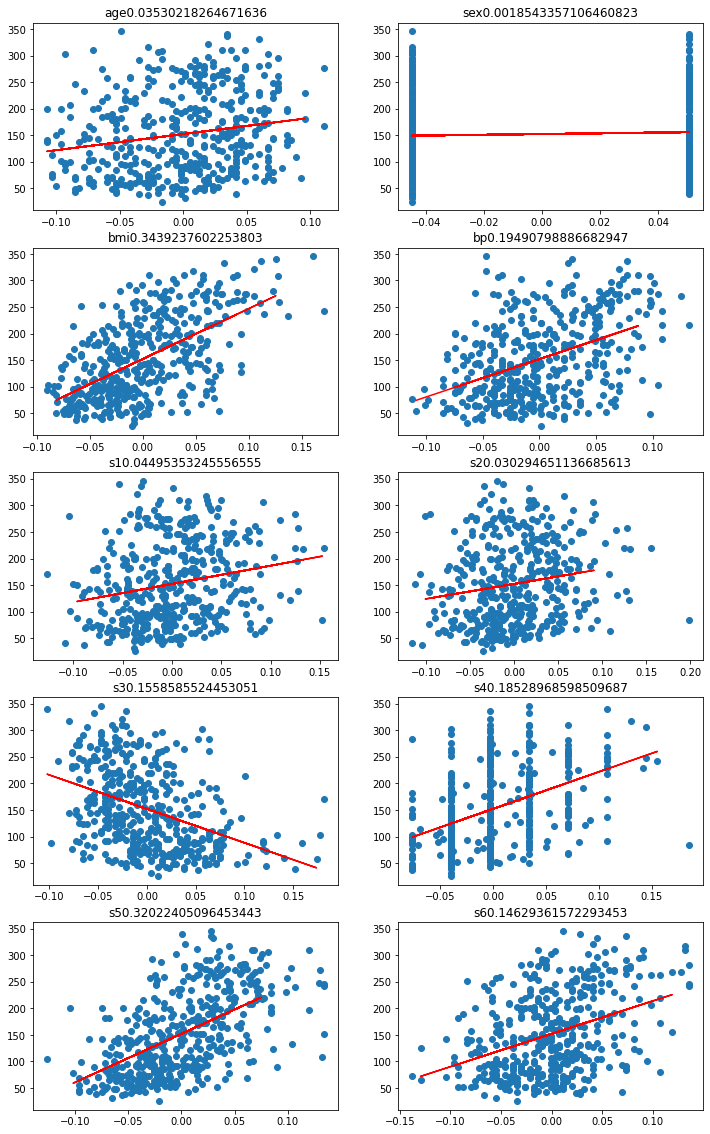

In [30]:
# 研究每个特征和标记(糖尿水平)之间的关系
# 用每个特征作为训练数据
plt.figure(figsize=(2 * 6, 4 * 5))
for i, col in enumerate(feature_names, 1):
    X_test = train_test_split(df[col], test_size=0.2)[1]
    X_test = np.array(X_test.values).reshape(-1, 1)
    linear = LinearRegression()
    linear.fit(df[col].values.reshape(-1, 1), target)
    y_ = linear.predict(X_test)
    
    X_train = df[[col]]
    axes = plt.subplot(5, 2, i)
    axes.scatter(df[col], target)
    axes.plot(X_test, y_, c='r')
    score = linear.score(X_train, target)
    axes.set_title(col + str(score))

第一步：训练

第二步：预测

## 二、岭回归

### 1、原理

In [4]:
from sklearn.linear_model import Ridge

In [ ]:
# 岭回归是对普通线性回归的优化, 他是

缩减系数来“理解”数据

如果数据的特征比样本点还多应该怎么办？是否还可以使用线性回归和之前的方法来做预测？

答案是否定的，即不能再使用前面介绍的方法。这是因为输入数据的矩阵X不是满秩矩阵。非满秩矩阵在求逆时会出现问题。

为了解决这个问题，统计学家引入了岭回归（ridge regression)的概念

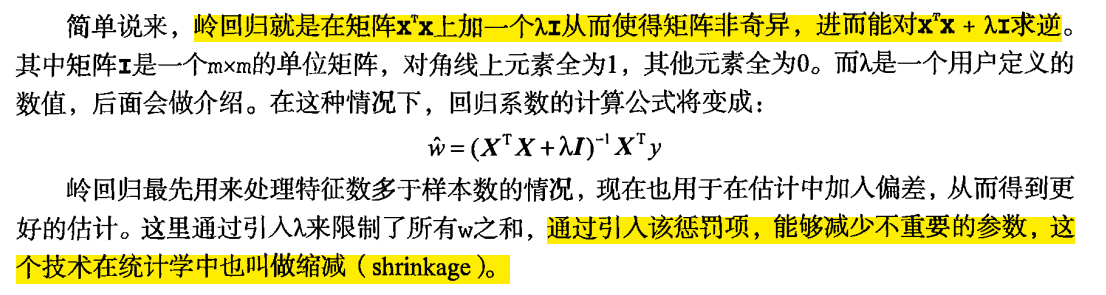

缩减方法可以去掉不重要的参数，因此能更好地理解数据。此外，与简单的线性回归相比，缩减法能取得更好的预测效果。

岭回归是加了二阶正则项(lambda*I)的最小二乘，主要适用于过拟合严重或各变量之间存在多重共线性的时候，岭回归是有bias的，这里的bias是为了让variance更小。

#### 归纳总结

1.岭回归可以解决特征数量比样本量多的问题

2.岭回归作为一种缩减算法可以判断哪些特征重要或者不重要，有点类似于降维的效果

3.缩减算法可以看作是对一个模型增加偏差的同时减少方差

岭回归用于处理下面两类问题：

1.数据点少于变量个数

2.变量间存在共线性（最小二乘回归得到的系数不稳定，方差很大）

### 2、实例

岭回归一般用在样本值不够的时候

In [46]:
from sklearn.linear_model import Ridge

In [ ]:
# 岭回归是对普通线性回归的优化,
# 它是在普通线性回归的基础之上加了L2(二阶正则项)的线性回归.

In [12]:
# 50个样本, 200个特征.没有唯一的解, 但是有无穷多个解
x = np.random.randn(50, 200)
y = np.random.randn(50)

使用普通线性回归

In [13]:
# 50个样本, 200个特征.没有唯一的解, 但是有无穷多个解
x = np.random.randn(50, 200)
y = np.random.randn(50)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
linear = LinearRegression()
linear.fit(x, y)

LinearRegression()

In [18]:
linear.score(x, y)

1.0

In [19]:
ridge = Ridge()
ridge.fit(x, y)
ridge.score(x, y)

0.9999546169744622

In [20]:
ridge.coef_

array([ 5.66947310e-06, -5.62193180e-03, -2.15357452e-02,  4.51708539e-02,
       -6.38243414e-03, -1.66744356e-02, -1.70562558e-02, -2.54603368e-02,
       -4.13700700e-02, -4.48002702e-02,  6.48461134e-03, -5.89390803e-02,
       -8.90149642e-03, -4.74781696e-03,  5.75988316e-02, -4.55093596e-02,
        6.55767091e-02, -3.06061444e-02,  1.67232536e-02,  1.35671813e-03,
       -2.08221737e-02,  5.88325947e-04,  1.72706863e-02,  2.21257686e-02,
        2.99048810e-02,  3.66556748e-02, -1.33337863e-02, -3.27467324e-02,
        6.68208339e-02,  7.82300694e-03,  1.29327069e-02, -6.10842400e-02,
        3.65083212e-02,  2.99248869e-02, -8.66410163e-03, -4.17753100e-02,
       -5.69262034e-02,  1.48728696e-02, -2.94844810e-02,  4.75719674e-02,
       -7.30847161e-02,  1.11402280e-02, -6.86720518e-02,  7.18248043e-03,
       -1.56905430e-02, -3.40462774e-02, -3.26460931e-02,  1.06037629e-01,
       -4.45109376e-02, -6.78242754e-02, -2.38121830e-02,  1.95722560e-02,
        1.17314489e-02, -

使用岭回归

In [24]:
# 2个样本3个系数.
n = np.array([[1, 2, 3], [2, 3, 5], [2, 4, 6]])
np.linalg.matrix_rank(n)

2

In [27]:
np.linalg.inv(np.dot(n.T, n))

array([[ 2.81474977e+14,  2.81474977e+14, -2.81474977e+14],
       [ 2.81474977e+14,  2.81474977e+14, -2.81474977e+14],
       [-2.81474977e+14, -2.81474977e+14,  2.81474977e+14]])

In [30]:
n2 = np.array([[1.001, 2,   3],
 [2, 3.001, 5],
  [2, 4, 6.001]])
np.linalg.inv(n2)

array([[ 6.65886176e+02,  6.68896545e-01, -3.33444928e+02],
       [ 6.69565441e+02, -2.34147236e+00, -3.32776031e+02],
       [-6.68227648e+02,  1.33779309e+00,  3.33110145e+02]])

## 三、lasso回归

### 1、原理

【拉格朗日乘数法】

对于参数w增加一个限定条件，能到达和岭回归一样的效果：

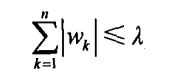

在lambda足够小的时候，一些系数会因此被迫缩减到0

In [ ]:
# lasso回归是普通线性回归加了L1(一阶正则项)
# 效果会比岭回归好一些.

In [47]:
from sklearn.linear_model import Lasso

In [34]:
lasso = Lasso(alpha=0.001,  max_iter=10000)
lasso.fit(x, y)

Lasso(alpha=0.001, max_iter=10000)

In [35]:
lasso.score(x, y)

0.9999678334229715

In [36]:
lasso.coef_

array([-0.        , -0.        ,  0.        ,  0.15681153, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.09109256,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.02430473, -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.10477416, -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.04882811, -0.        , -0.        ,  0.10315963,
       -0.05151061,  0.        , -0.07020197,  0.        , -0.        ,
       -0.        , -0.        ,  0.28751948, -0.        , -0.16549754,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.03147148,  0.        ,  0.        ,  0.0325265 ,
        0.        ,  0.        ,  0.03214066,  0.        , -0.        ,
       -0.        , -0.00350037, -0.        ,  0.        , -0.08

### 2、实例

## 四、普通线性回归、岭回归与lasso回归比较

使用numpy创建数据X，创建系数，对系数进行处理，对部分系数进行归零化操作，然后根据系数进行矩阵操作求得目标值  
增加噪声

In [31]:
X = np.random.randn(50, 200)

In [32]:
coefs = np.random.randn(200)

In [33]:
y = np.dot(X, coefs)

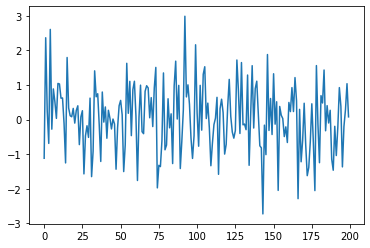

In [34]:
plt.plot(coefs)

In [35]:
linear = LinearRegression()
linear.fit(X, y)
linear_coef = linear.coef_

Text(0.5, 1.0, 'linear coefs')

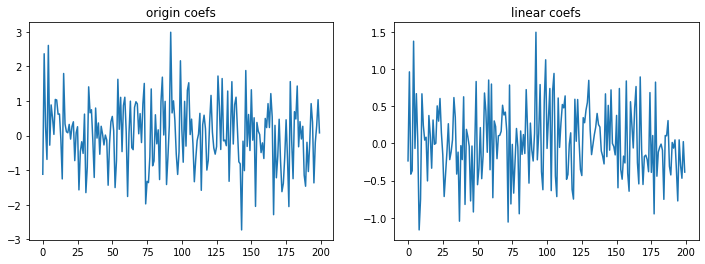

In [36]:
plt.figure(figsize=(2*6, 4))
axes1 = plt.subplot(1, 2, 1)
axes1.plot(coefs)
axes1.set_title('origin coefs')

axes2 = plt.subplot(1, 2, 2)
axes2.plot(linear_coef)
axes2.set_title('linear coefs')

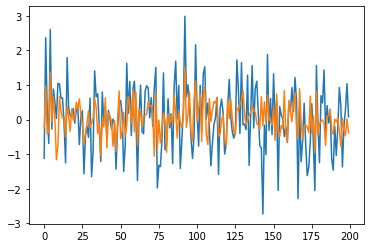

In [37]:
plt.plot(coefs)
plt.plot(linear_coef)

In [38]:
# 对coefs做个整理, 200个系数, 随机190个变成0 , 10个是非零的.
index = np.arange(200)
# 打乱索引
np.random.shuffle(index)

In [39]:
coefs[index[:190]] = 0

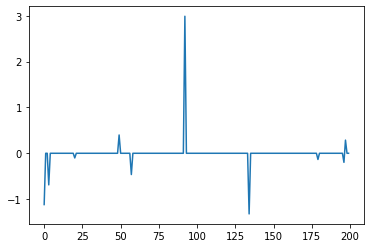

In [40]:
plt.plot(coefs)

In [41]:
y = np.dot(X, coefs)

In [42]:
linear = LinearRegression()
linear.fit(X, y)
linear_score = linear.score(X, y)

In [48]:
ridge = Ridge(alpha=0.001)
ridge.fit(X, y)
ridge_score = ridge.score(X, y)

In [61]:
    lasso = Lasso(alpha=0.001, max_iter=10000)
    lasso.fit(X, y)
    lasso_score = lasso.score(X, y)

Text(0.5, 1.0, 'lasso coefs 0.9999992089749078')

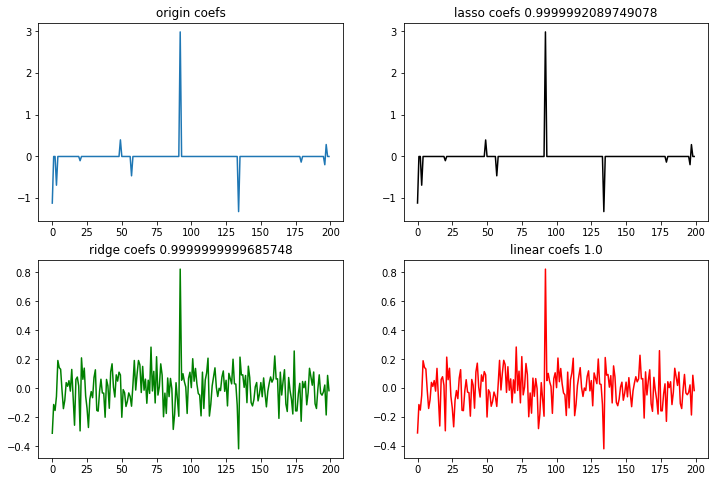

In [62]:
plt.figure(figsize=(2*6, 4 * 2))
axes1 = plt.subplot(2, 2, 1)
axes1.plot(coefs)
axes1.set_title('origin coefs')

axes4 = plt.subplot(2, 2, 4)
axes4.plot(linear.coef_, c='r')
axes4.set_title('linear coefs'  + ' '+ str(linear_score))

axes3 = plt.subplot(2, 2, 3)
axes3.plot(ridge.coef_, c='g')
axes3.set_title('ridge coefs'  + ' '+ str(ridge_score))

axes2 = plt.subplot(2, 2, 2)
axes2.plot(lasso.coef_, c='k')
axes2.set_title('lasso coefs'  + ' '+ str(lasso_score))

训练数据和测试数据

分别使用线性回归，岭回归，Lasso回归进行数据预测

数据视图，此处获取各个算法的训练数据的coef_:系数

### 扩展: 多项式回归

In [174]:
x_train = np.array([[6], [8], [10], [14], [18]])
y_train = np.array([[7], [9], [13], [17.5], [18]])

(4.0, 20.0, 4.0, 25.0)

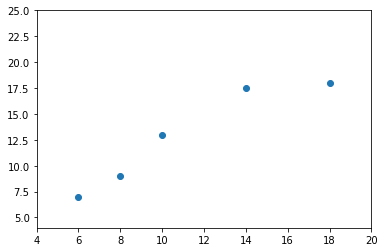

In [175]:
plt.scatter(x_train, y_train)
plt.axis((4, 20, 4, 25))

In [190]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [191]:
from sklearn.preprocessing import PolynomialFeatures

In [192]:
# n = np.array([[2, 3, 4]])

In [193]:
# poly2 = PolynomialFeatures()
# poly2.fit_transform(n)

In [194]:
poly2 = PolynomialFeatures()
x_train_poly2 = poly2.fit_transform(x_train)

In [195]:
linear_poly2 = LinearRegression()
linear_poly2.fit(x_train_poly2, y_train)

LinearRegression()

In [196]:
poly3 = PolynomialFeatures(degree=3)
x_train_poly3 = poly3.fit_transform(x_train)

In [197]:
linear_poly3 = LinearRegression()
linear_poly3.fit(x_train_poly3, y_train)

LinearRegression()

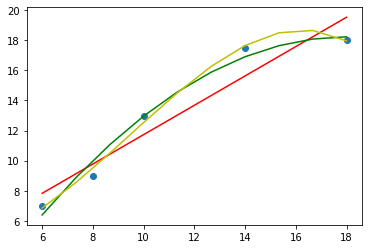

In [199]:
plt.scatter(x_train, y_train)
x_test = np.linspace(6, 18, num=10).reshape(-1, 1)
y_test = linear.predict(x_test)
plt.plot(x_test, y_test, c='r')

x_test_poly2 = poly2.transform(x_test)
y_test_poly2 = linear_poly2.predict(x_test_poly2)
plt.plot(x_test, y_test_poly2, c='g')

x_test_poly3 = poly3.transform(x_test)
y_test_poly3 = linear_poly3.predict(x_test_poly3)
plt.plot(x_test, y_test_poly3, c='y')

In [200]:
house = pd.read_excel('../data/Real estate valuation data set.xlsx')
house

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [202]:
# 取数据
data = house.iloc[:, 1:-1].copy()
target = house.iloc[:, -1].values.copy()

In [203]:
data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381
410,2012.666667,5.6,90.45606,9,24.97433,121.54310
411,2013.250000,18.8,390.96960,7,24.97923,121.53986
412,2013.000000,8.1,104.81010,5,24.96674,121.54067


In [250]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [251]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [252]:
linear.predict(X_test)

array([ 8.10597388, 41.21161094, 53.67778188, 34.09423892, 40.84157865,
       47.01756819, 31.09452544, 38.45360945, 45.69367989, 34.54049857,
       53.2856413 , 34.41853471, 42.53667004, 31.71574652, 49.32952361,
       31.69035604, 44.66263202, 13.24668885, 12.86821018, 35.14166159,
       42.63678236, 21.06292384, 41.26216701, 47.36402963, 41.71797718,
       26.81452019, 40.00446124, 44.16162417, 47.61495625, 15.16564203,
       44.97435311, 40.30469842, 34.15927655, 14.35291259, 34.06532708,
       41.45024847, 43.08415213, 45.50715631,  0.54717866, 43.3773425 ,
       37.43318166, 41.41864564, 44.55376475, 42.61267086, 35.90127925,
       37.49291887, 40.17921765, 33.01679429, 26.68856673, 37.0802239 ,
       41.955132  , 50.41119195, 48.80132199, 13.01488292, 31.17034468,
       30.60211541, 38.08219915, 46.9635048 , 42.4820139 , 12.82844685,
       29.79690054, 37.01615957, 31.92114927, 47.42746625, 50.51220844,
        9.9536683 , 39.59460854, 50.44330071, 28.15357356, 45.09

In [253]:
linear.score(X_test, y_test)

0.6990216560287723

In [254]:
linear.score(X_train, y_train)

0.5505990001073693

In [255]:
# 用多项式
poly4 = PolynomialFeatures(degree=2)
X_train_poly4 = poly4.fit_transform(X_train)

In [256]:
linear_poly4 = LinearRegression()
linear_poly4.fit(X_train_poly4, y_train)

LinearRegression()

In [257]:
linear_poly4.score(poly4.fit_transform(X_test), y_test)

0.7509048898900512

## 五、练习

### 1、使用多种方法对boston数据集进行回归，画出回归图像，并比较多种回归方法的效果

`
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
`

In [258]:
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target

In [259]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

### 2、预测鲍鱼的年龄

abalone.txt